# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Yosephine Cahaya Permatahari
- **Email:** yosepphine2004@gmail.com
- **ID Dicoding:** yosephinecahayap

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang memberikan kontribusi pendapatan terbesar dan bagaimana persebarannya?
- Bagaimana pola perilaku pelanggan berdasarkan Recency, Frequency, dan Monetary (RFM)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
customers = pd.read_csv('customers_dataset.csv')
geolocation = pd.read_csv('geolocation_dataset.csv')
sellers = pd.read_csv('sellers_dataset.csv')
products = pd.read_csv('products_dataset.csv')
category_translation = pd.read_csv('product_category_name_translation.csv')
orders = pd.read_csv('orders_dataset.csv')
order_reviews = pd.read_csv('order_reviews_dataset.csv')
order_payments = pd.read_csv('order_payments_dataset.csv')
order_items = pd.read_csv('order_items_dataset.csv')

**Insight:**

Pada tahap gathering data, digunakan sembilan dataset e-commerce yang saling terhubung dan merepresentasikan keseluruhan proses bisnis, mulai dari pelanggan melakukan pemesanan hingga transaksi diselesaikan dan dievaluasi.
- **Customers Dataset**
   Dataset ini menyimpan informasi identitas pelanggan, termasuk
   lokasi geografis (kota dan state). Data ini berperan penting
   dalam analisis distribusi pelanggan dan pemetaan wilayah
   dengan tingkat aktivitas transaksi tertinggi.

- **Geolocation Dataset**
   Dataset geolocation menyediakan informasi koordinat geografis
   berdasarkan kode pos. Data ini memungkinkan dilakukan analisis
   berbasis lokasi (geospatial analysis) untuk melihat pola
   persebaran pelanggan maupun penjual.

- **Sellers Dataset**
   Dataset sellers berisi informasi lokasi penjual. Data ini
   digunakan untuk menganalisis distribusi penjual serta potensi
   keterkaitan antara lokasi penjual dan aktivitas transaksi.

- **Products Dataset**
   Dataset ini memuat detail produk seperti kategori, deskripsi,
   dan dimensi produk. Informasi ini digunakan untuk menganalisis
   performa kategori produk, karakteristik produk, serta
   kontribusi produk terhadap total pendapatan.

- **Product Category Name Translation Dataset**
   Dataset ini berfungsi sebagai tabel referensi untuk menerjemahkan
   nama kategori produk ke dalam bahasa Inggris, sehingga hasil
   analisis dan visualisasi menjadi lebih mudah dipahami.

- **Orders Dataset**
   Dataset orders merupakan dataset inti yang mencatat seluruh
   aktivitas pemesanan, termasuk status pesanan dan waktu proses
   pemesanan. Data ini menjadi dasar dalam analisis tren pemesanan,
   waktu pengiriman, serta perilaku pembelian pelanggan.

- **Order Reviews Dataset**
   Dataset review menyimpan penilaian dan ulasan pelanggan terhadap
   pesanan yang telah dilakukan. Data ini dapat digunakan untuk
   menganalisis tingkat kepuasan pelanggan berdasarkan skor ulasan.

- **Order Payments Dataset**
   Dataset ini mencatat detail metode pembayaran dan nilai transaksi.
   Informasi ini sangat penting untuk analisis pendapatan, metode
   pembayaran yang paling sering digunakan, serta perhitungan nilai
   Monetary pada analisis RFM.

- **Order Items Dataset**
   Dataset order items menyimpan detail item pada setiap pesanan,
   termasuk harga produk dan biaya pengiriman. Dataset ini
   memungkinkan analisis performa produk, kontribusi penjual,
   serta perhitungan total nilai transaksi secara lebih detail.

### Assessing Data

In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
customers.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [5]:
customers.duplicated().sum()

np.int64(0)

In [6]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821361 entries, 0 to 821360
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  821361 non-null  int64  
 1   geolocation_lat              821361 non-null  float64
 2   geolocation_lng              821361 non-null  float64
 3   geolocation_city             821361 non-null  object 
 4   geolocation_state            821360 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 31.3+ MB


In [7]:
geolocation.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,1


In [8]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [9]:
sellers.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [10]:
sellers.duplicated().sum()

np.int64(0)

In [11]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [12]:
products.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [13]:
products.duplicated().sum()

np.int64(0)

In [14]:
category_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [15]:
category_translation.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [16]:
category_translation.duplicated().sum()

np.int64(0)

In [17]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [18]:
orders.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [19]:
orders.duplicated().sum()

np.int64(0)

In [20]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [21]:
order_reviews.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [22]:
order_reviews.duplicated().sum()

np.int64(0)

In [23]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [24]:
order_payments.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [25]:
order_payments.duplicated().sum()

np.int64(0)

In [26]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [27]:
order_items.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [28]:
order_items.duplicated().sum()

np.int64(0)

**Insight:**

Tahap assessing data dilakukan untuk mengevaluasi struktur, kelengkapan, dan tipe data pada setiap dataset yang digunakan.

- **Customers Dataset**
   Dataset customers terdiri dari 99.441 baris data dan seluruh kolom tidak memiliki missing value.

- **Geolocation Dataset**
   Dataset geolocation memiliki jumlah data 821.361 baris dengan hanya satu nilai kosong pada kolom geolocation_state.
   
- **Sellers Dataset**
   Dataset sellers terdiri dari 3.095 penjual dan tidak ditemukan missing value pada seluruh kolom.

- **Products Dataset**
   Dataset products memiliki beberapa missing value pada kolom kategori produk serta atribut deskripsi dan dimensi produk. Missing value ini kemungkinan disebabkan oleh produk yang belum memiliki informasi lengkap.

- **Product Category Name Translation Dataset**
   Dataset ini berisi 71 kategori produk dan tidak memiliki missing value.

- **Orders Dataset**
   Dataset orders merupakan dataset inti dengan 99.441 data pesanan. Terdapat missing value pada kolom tanggal persetujuan dan pengiriman, yang kemungkinan pesanan yang dibatalkan atau belum terkirim.

- **Order Reviews Dataset**
   Dataset review memiliki missing value yang cukup besar pada kolom komentar ulasan, namun seluruh data skor ulasan tersedia secara lengkap.

- **Order Payments Dataset**
   Dataset pembayaran memiliki data lengkap tanpa missing value pada seluruh kolom.

- **Order Items Dataset**
   Dataset order items juga tidak memiliki missing value. Dataset ini menyediakan detail harga produk dan biaya pengiriman yang lengkap, sehingga sangat mendukung analisis pendapatan dan performa produk secara rinci.

### Cleaning Data

In [29]:
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in date_cols:
    orders[col] = pd.to_datetime(orders[col])

In [35]:
data = orders.merge(order_items, on='order_id', how='left') \
             .merge(order_payments, on='order_id', how='left') \
             .merge(customers, on='customer_id', how='left') \
             .merge(products, on='product_id', how='left') \
             .merge(category_translation, on='product_category_name', how='left')

data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,BA,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,GO,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,SP,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,baby
118430,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,b80910977a37536adeddd63663f916ad,...,BA,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,home_appliances_2
118431,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,RJ,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories
118432,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,RJ,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118434 non-null  object        
 1   customer_id                    118434 non-null  object        
 2   order_status                   118434 non-null  object        
 3   order_purchase_timestamp       118434 non-null  datetime64[ns]
 4   order_approved_at              118258 non-null  datetime64[ns]
 5   order_delivered_carrier_date   116360 non-null  object        
 6   order_delivered_customer_date  115037 non-null  datetime64[ns]
 7   order_estimated_delivery_date  118434 non-null  datetime64[ns]
 8   order_item_id                  117604 non-null  float64       
 9   product_id                     117604 non-null  object        
 10  seller_id                      117604 non-null  object        
 11  

In [32]:
data.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,176
order_delivered_carrier_date,2074
order_delivered_customer_date,3397
order_estimated_delivery_date,0
order_item_id,830
product_id,830


In [33]:
data = data.dropna(subset=['product_id', 'price', 'payment_value'])

In [34]:
data['product_category_name_english'] = (
    data['product_category_name_english']
    .fillna('Unknown')
)

/tmp/ipython-input-588443820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['product_category_name_english'] = (


**Insight:**

Tahap cleaning data dilakukan untuk memastikan bahwa data yang digunakan dalam analisis memiliki kualitas yang baik dan relevan dengan tujuan analisis bisnis.

- **Konversi Tipe Data Waktu**
   Kolom yang berkaitan dengan waktu pemesanan dan pengiriman
   dikonversi ke tipe data datetime. Agar analisis berbasis waktu, seperti perhitungan recency dapat dilakukan secara akurat.

- **Penggabungan Dataset (Data Merging)**
   Beberapa dataset utama seperti orders, order items, payments,customers, products, dan category translation digabungkan menjadi satu dataset terintegrasi. Proses ini menghasilkan dataset dengan 118.434 baris data yang merepresentasikan transaksi secara end-to-end dari pemesanan hingga pembayaran.

- **Penanganan Missing Value pada Data Transaksi**
   Ditemukan sejumlah missing value pada kolom yang berkaitan langsung dengan transaksi, seperti product_id, price, dan payment_value. Baris data dengan nilai kosong pada kolom tersebut dihapus karena tidak dapat digunakan dalam analisis pendapatan maupun perhitungan nilai transaksi pelanggan.

- **Penanganan Missing Value pada Kategori Produk**
   Terdapat beberapa produk yang tidak memiliki informasi kategori dalam bahasa Inggris. Untuk menjaga konsistensi data dan menghindari kehilangan informasi transaksi yang valid, nilai kosong pada kolom product_category_name_english diisi dengan label "Unknown".

- **Penanganan Missing Value pada Kolom Tanggal**
   Missing value pada kolom tanggal persetujuan dan pengiriman dibiarkan karena mencerminkan kondisi bisnis nyata, seperti pesanan yang dibatalkan atau belum terkirim, sehingga tidak dianggap sebagai kesalahan data.

## Exploratory Data Analysis (EDA)

In [36]:
data.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,118434,118258,115037,118434,117604.000000,117604.000000,117604.000000,118431.000000,118431.000000,118431.000000,118434.000000,115906.000000,115906.000000,115906.000000,117584.000000,117584.000000,117584.00000,117584.000000
mean,2017-12-30 04:00:24.559636480,2017-12-30 14:12:31.341397248,2018-01-13 06:29:34.791693312,2018-01-23 00:31:38.941182208,1.195920,120.822849,20.045551,1.094207,2.937398,172.849395,35034.264392,48.767208,786.957302,2.207849,2114.281067,30.256872,16.63029,23.068394
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-11 13:46:32,2016-09-30 00:00:00,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1003.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.00000,6.000000
25%,2017-09-11 12:53:55.249999872,2017-09-11 22:45:23,2017-09-25 13:56:47,2017-10-02 00:00:00,1.000000,39.900000,13.080000,1.000000,1.000000,60.860000,11310.000000,42.000000,347.000000,1.000000,300.000000,18.000000,8.00000,15.000000
50%,2018-01-17 17:57:56.500000,2018-01-18 02:11:35,2018-02-01 19:16:53,2018-02-14 00:00:00,1.000000,74.900000,16.290000,1.000000,2.000000,108.200000,24240.000000,52.000000,601.000000,1.000000,700.000000,25.000000,13.00000,20.000000
75%,2018-05-03 19:05:01,2018-05-04 02:51:40.249999872,2018-05-15 16:51:55,2018-05-25 00:00:00,1.000000,134.900000,21.190000,1.000000,4.000000,189.245000,58464.500000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.00000,30.000000
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-10-17 13:22:46,2018-11-12 00:00:00,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,99990.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.00000,118.000000
std,NaN,NaN,NaN,NaN,0.697721,184.477367,15.861351,0.728290,2.774164,268.259831,29819.290218,10.035162,653.029009,1.719519,3788.754048,16.190874,13.45878,11.748372


**Insight:**

Analisis statistik deskriptif dilakukan untuk memahami karakteristik
utama data transaksi e-commerce yang digunakan dalam penelitian ini.

- Karakteristik Waktu Transaksi
  Data transaksi berada pada rentang waktu September 2016 hingga Oktober 2018. Nilai median order_purchase_timestamp berada pada Januari 2018, menunjukkan bahwa sebagian besar transaksi terjadi pada periode akhir 2017 hingga pertengahan 2018. Hal ini mengindikasikan adanya pertumbuhan aktivitas transaksi pada periode tersebut.

- Pola Jumlah Item dalam Pesanan
  Nilai median order_item_id adalah 1, dengan rata-rata sebesar 1,19. Hal ini menunjukkan bahwa mayoritas pesanan hanya terdiri dari satu item, sementara pesanan dengan banyak item merupakan kasus yang relatif jarang.

- Analisis Harga dan Biaya Pengiriman
  Harga produk (price) memiliki nilai median sebesar 74,9 dan rata-rata sebesar 120,82, dengan nilai maksimum yang cukup tinggi (6.735). Perbedaan signifikan antara nilai rata-rata dan median mengindikasikan adanya right-skewed distribution, di mana sebagian kecil produk dengan harga sangat tinggi memengaruhi nilai rata-rata.
  Biaya pengiriman (freight_value) memiliki median sebesar 16,29 dan rata-rata 20,05, yang menunjukkan bahwa biaya logistik merupakan komponen signifikan dalam total transaksi pelanggan.

- Pola Pembayaran Pelanggan
  Sebagian besar transaksi menggunakan satu metode pembayaran dengan nilai median payment_sequential sebesar 1.
  Jumlah cicilan (payment_installments) memiliki median 2, yang menunjukkan bahwa pembayaran secara cicilan cukup umum digunakan oleh pelanggan.
  Nilai transaksi (payment_value) memiliki median sebesar 108,2 dan rata-rata 172,85, dengan nilai maksimum mencapai 13.664, menunjukkan distribusi yang tidak simetris dan dipengaruhi oleh transaksi bernilai tinggi.

- Karakteristik Lokasi Pelanggan
  Nilai customer_zip_code_prefix menunjukkan sebaran geografis pelanggan yang luas.
  Standar deviasi yang cukup besar mengindikasikan bahwa pelanggan berasal dari berbagai wilayah dengan tingkat aktivitas transaksi yang beragam.

- Karakteristik Produk
  Sebagian besar produk memiliki panjang nama produk sekitar 52 karakter, panjang deskripsi sekitar 601 karakter, jumlah foto produk median 1
  Dimensi produk menunjukkan bahwa mayoritas produk memiliki berat relatif ringan (median 700 gram) dengan ukuran sedang, yang berpotensi memengaruhi efisiensi pengiriman dan biaya logistik.

- Indikasi Outlier
  Nilai maksimum yang sangat tinggi pada beberapa variabel seperti price, payment_value, dan product_weight_g mengindikasikan adanya outlier.
  Oleh karena itu, analisis lanjutan perlu menggunakan visualisasi seperti boxplot atau transformasi data untuk memahami dampak outlier terhadap hasil analisis.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk apa yang memberikan kontribusi pendapatan terbesar dan bagaimana persebarannya?

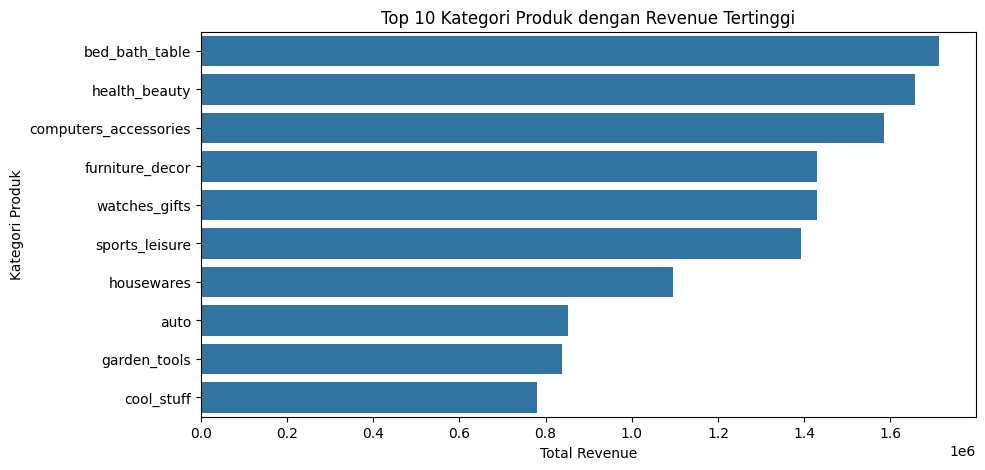

In [39]:
revenue_category = (
    data.groupby('product_category_name_english')['payment_value']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(x=revenue_category.values, y=revenue_category.index)
plt.title('Top 10 Kategori Produk dengan Revenue Tertinggi')
plt.xlabel('Total Revenue')
plt.ylabel('Kategori Produk')
plt.show()

### Pertanyaan 2: Bagaimana pola perilaku pelanggan berdasarkan Recency, Frequency, dan Monetary (RFM)?

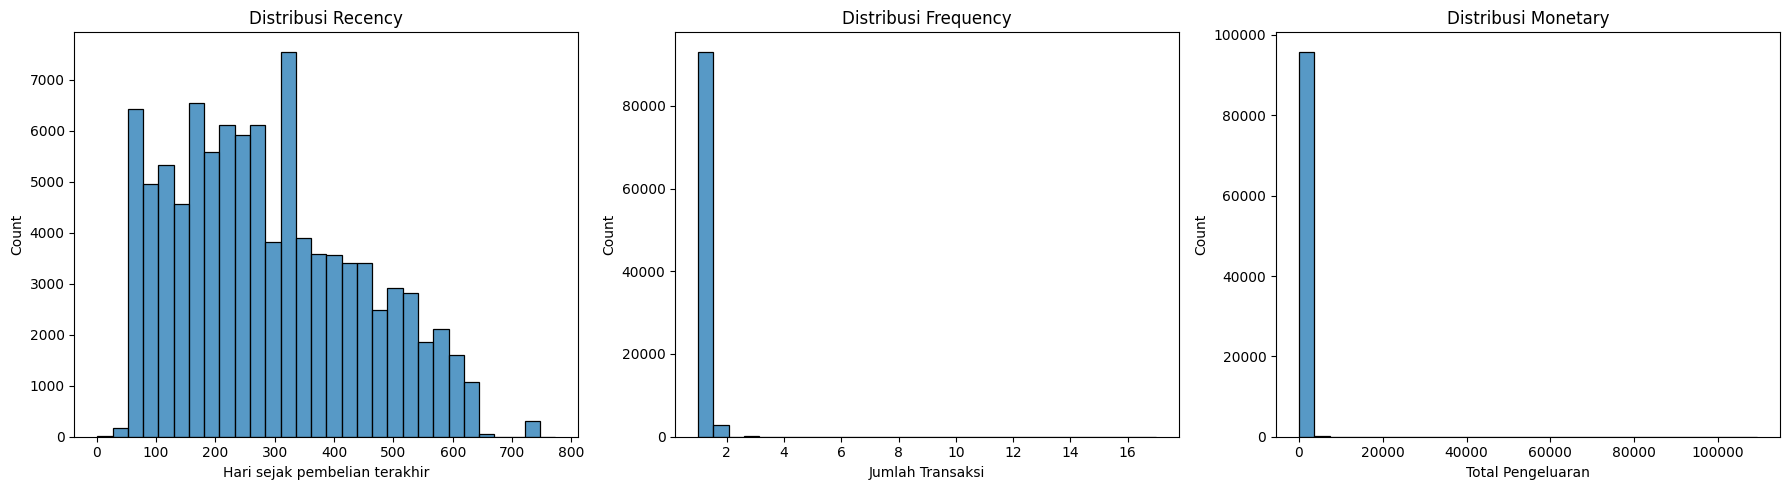

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.histplot(rfm['recency'], bins=30, ax=axes[0])
axes[0].set_title('Distribusi Recency')
axes[0].set_xlabel('Hari sejak pembelian terakhir')

sns.histplot(rfm['frequency'], bins=30, ax=axes[1])
axes[1].set_title('Distribusi Frequency')
axes[1].set_xlabel('Jumlah Transaksi')

sns.histplot(rfm['monetary'], bins=30, ax=axes[2])
axes[2].set_title('Distribusi Monetary')
axes[2].set_xlabel('Total Pengeluaran')

plt.tight_layout()
plt.show()

**Insight:**

**Pertanyaan 1: Kategori produk apa yang memberikan kontribusi pendapatan terbesar dan bagaimana persebarannya?**
- Kategori bed_bath_table memberikan kontribusi pendapatan terbesar
  dibandingkan kategori lainnya, menunjukkan tingginya permintaan produk rumah tangga.

- Kategori health_beauty dan computers_accessories berada di posisi berikutnya  mengindikasikan bahwa produk perawatan diri dan aksesoris teknologi juga  menjadi sumber revenue utama.

- Beberapa kategori seperti furniture_decor, watches_gifts, dan sports_leisure
  memiliki kontribusi pendapatan yang relatif seimbang dan stabil.

- Perbedaan revenue antar kategori cukup signifikan, menunjukkan bahwa  pendapatan tidak tersebar merata di seluruh kategori produk.

- Hal ini mengindikasikan adanya kategori unggulan (core revenue drivers) yang berpotensi menjadi fokus strategi bisnis dan pemasaran.

**Pertanyaan 2: Bagaimana pola perilaku pelanggan berdasarkan Recency, Frequency, dan Monetary (RFM)?**

- Recency menunjukkan sebagian besar pelanggan terakhir melakukan transaksi dalam rentang kurang dari 300 hari, namun terdapat ekor panjang hingga lebih dari 700 hari, yang mengindikasikan adanya pelanggan tidak aktif (churn).

- Frequency sangat didominasi oleh pelanggan dengan jumlah transaksi rendah (1–2 transaksi), menandakan mayoritas pelanggan bersifat one-time atau low-repeat buyers.

- Monetary menunjukkan distribusi yang sangat condong ke nilai rendah, di mana sebagian besar pelanggan memiliki total pengeluaran kecil.

- Terdapat sejumlah kecil pelanggan dengan nilai monetary sangat tinggi, yang berkontribusi besar terhadap total pendapatan.

- Pola RFM secara keseluruhan menunjukkan bahwa bisnis sangat bergantung pada pelanggan bernilai tinggi namun jumlahnya sedikit, sehingga retensi pelanggan loyal menjadi aspek penting.

## Analisis Lanjutan (Opsional)

In [37]:
snapshot_date = data['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

In [38]:
rfm = data.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'nunique',
    'payment_value': 'sum'
}).reset_index()

rfm.columns = ['customer_unique_id', 'recency', 'frequency', 'monetary']
rfm

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19
2,0000f46a3911fa3c0805444483337064,586,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.89
...,...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,496,1,4134.84
96092,fffea47cd6d3cc0a88bd621562a9d061,311,1,84.58
96093,ffff371b4d645b6ecea244b27531430a,618,1,112.46
96094,ffff5962728ec6157033ef9805bacc48,169,1,133.69


## Conclusion

- Conclution pertanyaan 1
  
  Kategori produk yang memberikan kontribusi pendapatan terbesar adalah bed_bath_table, diikuti oleh health_beauty dan computers_accessories. Hal ini menunjukkan bahwa produk kebutuhan rumah tangga, perawatan diri, dan aksesoris teknologi merupakan penggerak utama pendapatan pada platform e-commerce ini. Distribusi pendapatan yang tidak merata antar kategori mengindikasikan bahwa fokus strategi bisnis sebaiknya diarahkan pada penguatan kategori unggulan, tanpa mengabaikan potensi pengembangan kategori lain dengan kontribusi menengah.

- Conclution pertanyaan 2
  
  Analisis RFM menunjukkan bahwa mayoritas pelanggan memiliki frekuensi transaksi rendah dan nilai pengeluaran kecil, dengan sebagian besar pelanggan hanya melakukan satu atau dua kali pembelian. Namun, terdapat sejumlah kecil pelanggan dengan nilai monetary yang sangat tinggi yang berkontribusi signifikan terhadap total pendapatan. Selain itu, adanya pelanggan dengan nilai recency yang besar mengindikasikan potensi churn pelanggan. Oleh karena itu, strategi retensi pelanggan bernilai tinggi dan reaktivasi pelanggan tidak aktif menjadi faktor penting dalam meningkatkan kinerja bisnis secara berkelanjutan.